In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("FOR_CLUSTERING.csv")

In [3]:
df.head(180)

,Year,STUDENT_ID,STUDENT_SECTION,STUDENT_TYPE,SCHOOL,SCHOOL_CATEGORY1,SCHOOL_CATEGORY2,GRADUATION_YEAR,ESTIMATED_AGE,LOCATION_PROVINCE,...,RW-Inorganic,RW-Organic,RW-Physical,ANALYTICAL,BIOCHEMISTRY,INORGANIC,ORGANIC,PHYSICAL,DAY SCHEDULE,TIME SCHEDULE
0,2018,81103,H+,Chemist,POLYTECHNIC UNIVERSITY OF THE PHILIPPINES,State University,Non-sectarian,2018,21,METRO MANILA,...,NaN,NaN,NaN,55.444444,50.000000,63.777778,47.318841,48.000000,"Saturday, Sunday",Morning
1,2018,81104,H+,Chemist,POLYTECHNIC UNIVERSITY OF THE PHILIPPINES,State University,Non-sectarian,2018,21,METRO MANILA,...,NaN,NaN,NaN,54.111111,53.571429,60.444444,49.072464,46.962963,"Saturday, Sunday",Morning
2,2018,81106,H+,Chemist,UNIVERSITY OF SANTO TOMAS,Private University,Catholic,2018,21,METRO MANILA,...,NaN,NaN,NaN,43.333333,45.714286,40.888889,45.942029,32.000000,"Saturday, Sunday",Morning
3,2018,81110,H+,Chemist,UNIVERSITY OF THE PHILIPPINES,State University,Non-sectarian,2018,21,METRO MANILA,...,63.333333,81.428571,75.862069,75.444444,77.142857,81.222222,73.811594,62.259259,"Saturday, Sunday",Morning
4,2018,81113,H+,Chemist,DE LA SALLE UNIVERSITY,Private University,Catholic,2017,22,METRO MANILA,...,NaN,NaN,NaN,32.000000,37.857143,40.777778,39.565217,34.333333,"Saturday, Sunday",Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2019,91542,N,Chemist,ADAMSON UNIVERSITY,Private School,Catholic,2019,21,METRO MANILA,...,NaN,NaN,NaN,42.333333,31.019037,46.444444,31.844203,31.090067,"Saturday, Sunday",Evening
176,2019,91543,N,Chemist,POLYTECHNIC UNIVERSITY OF THE PHILIPPINES,State University,Non-sectarian,2013,27,METRO MANILA,...,NaN,NaN,NaN,43.333333,36.762118,42.555556,38.101449,31.422559,"Saturday, Sunday",Evening
177,2019,91545,N,Chemist,UNIVERSITY OF THE PHILIPPINES,State University,Non-sectarian,2019,21,METRO MANILA,...,NaN,NaN,NaN,61.333333,55.168773,60.333333,55.315217,49.053030,"Saturday, Sunday",Evening
178,2019,91546,N,Chemist,UNIVERSITY OF SOUTHERN MINDANAO,State University,Non-sectarian,2019,21,COTABATO,...,NaN,NaN,NaN,37.000000,28.773530,40.888889,31.916667,31.069024,Tuesday to Friday,Evening


In [4]:
dummies = pd.get_dummies(df['SCHOOL']).rename(columns=lambda x: 'SCHOOL_' + str(x))
df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['LOCATION_PROVINCE']).rename(columns=lambda x: 'LOCATION_PROVINCE_' + str(x))
df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['DAY SCHEDULE']).rename(columns=lambda x: 'DAY SCHEDULE_' + str(x))
df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['TIME SCHEDULE']).rename(columns=lambda x: 'TIME SCHEDULE_' + str(x))
df = pd.concat([df, dummies], axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder_A = LabelEncoder()
df['CHEM_RESULT'] = encoder_A.fit_transform(df['CHEM_RESULT'])

In [6]:
df.head(180)

,Year,STUDENT_ID,STUDENT_SECTION,STUDENT_TYPE,SCHOOL,SCHOOL_CATEGORY1,SCHOOL_CATEGORY2,GRADUATION_YEAR,ESTIMATED_AGE,LOCATION_PROVINCE,...,LOCATION_PROVINCE_SORSOGON,LOCATION_PROVINCE_SOUTH COTABATO,LOCATION_PROVINCE_TARLAC,"DAY SCHEDULE_Saturday, Sunday",DAY SCHEDULE_Tuesday to Friday,"DAY SCHEDULE_Tuesday, Thursday",TIME SCHEDULE_Afternoon,TIME SCHEDULE_All Day,TIME SCHEDULE_Evening,TIME SCHEDULE_Morning
0,2018,81103,H+,Chemist,POLYTECHNIC UNIVERSITY OF THE PHILIPPINES,State University,Non-sectarian,2018,21,METRO MANILA,...,0,0,0,1,0,0,0,0,0,1
1,2018,81104,H+,Chemist,POLYTECHNIC UNIVERSITY OF THE PHILIPPINES,State University,Non-sectarian,2018,21,METRO MANILA,...,0,0,0,1,0,0,0,0,0,1
2,2018,81106,H+,Chemist,UNIVERSITY OF SANTO TOMAS,Private University,Catholic,2018,21,METRO MANILA,...,0,0,0,1,0,0,0,0,0,1
3,2018,81110,H+,Chemist,UNIVERSITY OF THE PHILIPPINES,State University,Non-sectarian,2018,21,METRO MANILA,...,0,0,0,1,0,0,0,0,0,1
4,2018,81113,H+,Chemist,DE LA SALLE UNIVERSITY,Private University,Catholic,2017,22,METRO MANILA,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2019,91542,N,Chemist,ADAMSON UNIVERSITY,Private School,Catholic,2019,21,METRO MANILA,...,0,0,0,1,0,0,0,0,1,0
176,2019,91543,N,Chemist,POLYTECHNIC UNIVERSITY OF THE PHILIPPINES,State University,Non-sectarian,2013,27,METRO MANILA,...,0,0,0,1,0,0,0,0,1,0
177,2019,91545,N,Chemist,UNIVERSITY OF THE PHILIPPINES,State University,Non-sectarian,2019,21,METRO MANILA,...,0,0,0,1,0,0,0,0,1,0
178,2019,91546,N,Chemist,UNIVERSITY OF SOUTHERN MINDANAO,State University,Non-sectarian,2019,21,COTABATO,...,0,0,0,0,1,0,0,0,1,0


In [7]:
pd.get_option('display.max_columns')

20

In [8]:
df

,Year,STUDENT_ID,STUDENT_SECTION,STUDENT_TYPE,SCHOOL,SCHOOL_CATEGORY1,SCHOOL_CATEGORY2,GRADUATION_YEAR,ESTIMATED_AGE,LOCATION_PROVINCE,...,LOCATION_PROVINCE_SORSOGON,LOCATION_PROVINCE_SOUTH COTABATO,LOCATION_PROVINCE_TARLAC,"DAY SCHEDULE_Saturday, Sunday",DAY SCHEDULE_Tuesday to Friday,"DAY SCHEDULE_Tuesday, Thursday",TIME SCHEDULE_Afternoon,TIME SCHEDULE_All Day,TIME SCHEDULE_Evening,TIME SCHEDULE_Morning
0,2018,81103,H+,Chemist,POLYTECHNIC UNIVERSITY OF THE PHILIPPINES,State University,Non-sectarian,2018,21,METRO MANILA,...,0,0,0,1,0,0,0,0,0,1
1,2018,81104,H+,Chemist,POLYTECHNIC UNIVERSITY OF THE PHILIPPINES,State University,Non-sectarian,2018,21,METRO MANILA,...,0,0,0,1,0,0,0,0,0,1
2,2018,81106,H+,Chemist,UNIVERSITY OF SANTO TOMAS,Private University,Catholic,2018,21,METRO MANILA,...,0,0,0,1,0,0,0,0,0,1
3,2018,81110,H+,Chemist,UNIVERSITY OF THE PHILIPPINES,State University,Non-sectarian,2018,21,METRO MANILA,...,0,0,0,1,0,0,0,0,0,1
4,2018,81113,H+,Chemist,DE LA SALLE UNIVERSITY,Private University,Catholic,2017,22,METRO MANILA,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2019,91542,N,Chemist,ADAMSON UNIVERSITY,Private School,Catholic,2019,21,METRO MANILA,...,0,0,0,1,0,0,0,0,1,0
176,2019,91543,N,Chemist,POLYTECHNIC UNIVERSITY OF THE PHILIPPINES,State University,Non-sectarian,2013,27,METRO MANILA,...,0,0,0,1,0,0,0,0,1,0
177,2019,91545,N,Chemist,UNIVERSITY OF THE PHILIPPINES,State University,Non-sectarian,2019,21,METRO MANILA,...,0,0,0,1,0,0,0,0,1,0
178,2019,91546,N,Chemist,UNIVERSITY OF SOUTHERN MINDANAO,State University,Non-sectarian,2019,21,COTABATO,...,0,0,0,0,1,0,0,0,1,0


In [9]:
df.count()

Year                              180
STUDENT_ID                        180
STUDENT_SECTION                   180
STUDENT_TYPE                      180
SCHOOL                            180
                                 ... 
DAY SCHEDULE_Tuesday, Thursday    180
TIME SCHEDULE_Afternoon           180
TIME SCHEDULE_All Day             180
TIME SCHEDULE_Evening             180
TIME SCHEDULE_Morning             180
Length: 99, dtype: int64

In [10]:
df.drop([104,120],axis=0,inplace=True)

In [11]:
df.count()

Year                              178
STUDENT_ID                        178
STUDENT_SECTION                   178
STUDENT_TYPE                      178
SCHOOL                            178
                                 ... 
DAY SCHEDULE_Tuesday, Thursday    178
TIME SCHEDULE_Afternoon           178
TIME SCHEDULE_All Day             178
TIME SCHEDULE_Evening             178
TIME SCHEDULE_Morning             178
Length: 99, dtype: int64

In [12]:
df.drop(109,axis=0,inplace=True)

In [13]:
from sklearn.cluster import KMeans

In [14]:
features = ['Pre-Review', 'Comprehensive','Post-Review','Growth(Pre-Post)','Growth(Pre-Compre)','ANALYTICAL','BIOCHEMISTRY','INORGANIC','ORGANIC','PHYSICAL','LOCATION_PROVINCE_METRO MANILA','LOCATION_PROVINCE_CAVITE','LOCATION_PROVINCE_BULACAN','LOCATION_PROVINCE_RIZAL','LOCATION_PROVINCE_LAGUNA','LOCATION_PROVINCE_COTABATO','DAY SCHEDULE_Saturday, Sunday','DAY SCHEDULE_Tuesday to Friday','DAY SCHEDULE_Tuesday, Thursday','TIME SCHEDULE_Afternoon','TIME SCHEDULE_All Day','TIME SCHEDULE_Evening','TIME SCHEDULE_Morning','CHEM_RESULT','SCHOOL_UNIVERSITY OF THE PHILIPPINES','SCHOOL_POLYTECHNIC UNIVERSITY OF THE PHILIPPINES','SCHOOL_UNIVERSITY OF SANTO TOMAS','SCHOOL_DE LA SALLE UNIVERSITY','SCHOOL_ADAMSON UNIVERSITY','SCHOOL_BICOL UNIVERSITY','SCHOOL_UNIVERSITY OF SOUTHERN MINDANAO','SCHOOL_ATENEO DE MANILA UNIVERSITY','SCHOOL_PAMANTASAN NG LUNGSOD NG MAYNILA']
X = df[features]

X.head(5)

,Pre-Review,Comprehensive,Post-Review,Growth(Pre-Post),Growth(Pre-Compre),ANALYTICAL,BIOCHEMISTRY,INORGANIC,ORGANIC,PHYSICAL,...,CHEM_RESULT,SCHOOL_UNIVERSITY OF THE PHILIPPINES,SCHOOL_POLYTECHNIC UNIVERSITY OF THE PHILIPPINES,SCHOOL_UNIVERSITY OF SANTO TOMAS,SCHOOL_DE LA SALLE UNIVERSITY,SCHOOL_ADAMSON UNIVERSITY,SCHOOL_BICOL UNIVERSITY,SCHOOL_UNIVERSITY OF SOUTHERN MINDANAO,SCHOOL_ATENEO DE MANILA UNIVERSITY,SCHOOL_PAMANTASAN NG LUNGSOD NG MAYNILA
0,33.50,59.768116,62.156522,28.656522,26.268116,55.444444,50.000000,63.777778,47.318841,48.000000,...,2,0,1,0,0,0,0,0,0,0
1,34.50,55.952381,64.230780,29.730780,21.452381,54.111111,53.571429,60.444444,49.072464,46.962963,...,2,0,1,0,0,0,0,0,0,0
2,37.75,41.463768,43.920497,6.170497,3.713768,43.333333,45.714286,40.888889,45.942029,32.000000,...,2,0,0,1,0,0,0,0,0,0
3,57.50,76.157350,84.342305,26.842305,18.657350,75.444444,77.142857,81.222222,73.811594,62.259259,...,2,1,0,0,0,0,0,0,0,0
4,24.75,43.008282,40.340373,15.590373,18.258282,32.000000,37.857143,40.777778,39.565217,34.333333,...,2,0,0,0,1,0,0,0,0,0


In [15]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

In [16]:
sse

[196998.76757952906,
 83729.07864025667,
 57746.94257384254,
 46785.218408862915,
 38277.36537618922,
 35271.734535105395,
 33102.438933643614,
 31306.623210228903,
 28890.654442651816]

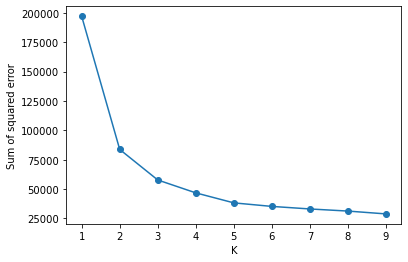

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse,marker = 'o')

In [18]:
km = KMeans(n_clusters= 4)

km.fit(X)

labels = km.predict(X)

new_data = X.copy()

new_data['labels'] = labels

In [19]:
new_data['labels'].value_counts()

3    69
0    56
1    36
2    16
Name: labels, dtype: int64

In [20]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,Pre-Review,Comprehensive,Post-Review,Growth(Pre-Post),Growth(Pre-Compre),ANALYTICAL,BIOCHEMISTRY,INORGANIC,ORGANIC,PHYSICAL,...,SCHOOL_UNIVERSITY OF THE PHILIPPINES,SCHOOL_POLYTECHNIC UNIVERSITY OF THE PHILIPPINES,SCHOOL_UNIVERSITY OF SANTO TOMAS,SCHOOL_DE LA SALLE UNIVERSITY,SCHOOL_ADAMSON UNIVERSITY,SCHOOL_BICOL UNIVERSITY,SCHOOL_UNIVERSITY OF SOUTHERN MINDANAO,SCHOOL_ATENEO DE MANILA UNIVERSITY,SCHOOL_PAMANTASAN NG LUNGSOD NG MAYNILA,labels
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.0
mean,36.999745,49.982048,49.814876,12.815131,12.982303,49.071429,44.643143,51.007937,45.050660,39.264009,...,0.321429,0.071429,0.267857,0.107143,0.125000,0.017857,0.017857,0.017857,0.0,0.0
std,3.784309,4.327251,4.041065,5.634030,5.484541,4.312508,5.537569,4.970118,5.677466,3.798727,...,0.471251,0.259870,0.446850,0.312094,0.333712,0.133631,0.133631,0.133631,0.0,0.0
min,27.000000,41.202899,40.900266,-3.369979,1.952899,39.000000,31.134219,40.888889,32.246377,30.159933,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,34.585714,47.178054,47.308100,8.828555,8.211345,46.277778,40.387805,47.472222,42.196558,36.515152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,36.735714,50.493613,49.688879,12.657213,13.904275,48.722222,44.913481,51.833333,43.865942,39.607744,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,39.273214,53.296683,53.538061,16.165685,16.932242,52.138889,49.285714,54.222222,49.507246,41.933923,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,47.500000,59.060438,57.775845,26.620980,23.610438,57.666667,57.474537,61.555556,57.710145,46.835017,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


In [21]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,Pre-Review,Comprehensive,Post-Review,Growth(Pre-Post),Growth(Pre-Compre),ANALYTICAL,BIOCHEMISTRY,INORGANIC,ORGANIC,PHYSICAL,...,SCHOOL_UNIVERSITY OF THE PHILIPPINES,SCHOOL_POLYTECHNIC UNIVERSITY OF THE PHILIPPINES,SCHOOL_UNIVERSITY OF SANTO TOMAS,SCHOOL_DE LA SALLE UNIVERSITY,SCHOOL_ADAMSON UNIVERSITY,SCHOOL_BICOL UNIVERSITY,SCHOOL_UNIVERSITY OF SOUTHERN MINDANAO,SCHOOL_ATENEO DE MANILA UNIVERSITY,SCHOOL_PAMANTASAN NG LUNGSOD NG MAYNILA,labels
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0,36.0
mean,40.704365,60.644108,62.461661,21.757296,19.939743,57.845679,54.489082,61.740741,54.327899,47.206743,...,0.472222,0.083333,0.083333,0.083333,0.083333,0.027778,0.027778,0.111111,0.0,1.0
std,4.489565,3.719897,3.534597,5.064008,5.373983,4.356129,5.236193,4.845988,5.028550,4.161741,...,0.506309,0.280306,0.280306,0.280306,0.280306,0.166667,0.166667,0.318728,0.0,0.0
min,29.000000,52.978107,53.611042,12.656881,4.700650,48.777778,46.913560,51.111111,45.449275,36.851852,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,37.437500,58.564182,60.136158,18.743875,16.541796,54.666667,51.769517,59.111111,49.850543,44.138258,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,41.260714,60.698405,63.366087,21.124776,19.646267,57.555556,53.782461,62.444444,53.688406,47.537037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
75%,44.026786,64.135831,64.605024,24.877802,23.345890,61.166667,55.939650,64.861111,59.297101,50.408249,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
max,49.121429,65.764724,70.615949,33.185589,30.260870,66.777778,69.285714,70.777778,64.188406,54.296296,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0


In [22]:
# Cluster 2 
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,Pre-Review,Comprehensive,Post-Review,Growth(Pre-Post),Growth(Pre-Compre),ANALYTICAL,BIOCHEMISTRY,INORGANIC,ORGANIC,PHYSICAL,...,SCHOOL_UNIVERSITY OF THE PHILIPPINES,SCHOOL_POLYTECHNIC UNIVERSITY OF THE PHILIPPINES,SCHOOL_UNIVERSITY OF SANTO TOMAS,SCHOOL_DE LA SALLE UNIVERSITY,SCHOOL_ADAMSON UNIVERSITY,SCHOOL_BICOL UNIVERSITY,SCHOOL_UNIVERSITY OF SOUTHERN MINDANAO,SCHOOL_ATENEO DE MANILA UNIVERSITY,SCHOOL_PAMANTASAN NG LUNGSOD NG MAYNILA,labels
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,16.000000,16.0000,16.000,16.000000,16.0000,16.0,16.0,16.000000,16.0,16.0
mean,53.951004,72.910913,71.347320,17.396316,18.959908,67.013889,65.746864,72.902778,66.979167,59.582334,...,0.250000,0.0625,0.375,0.125000,0.0625,0.0,0.0,0.125000,0.0,2.0
std,6.227975,5.224931,5.954916,8.600154,7.270525,6.115604,7.805844,4.315133,7.494106,3.789873,...,0.447214,0.2500,0.500,0.341565,0.2500,0.0,0.0,0.341565,0.0,0.0
min,41.014286,65.333333,61.474948,0.005357,4.225543,54.000000,53.571429,65.666667,56.036232,53.653199,...,0.000000,0.0000,0.000,0.000000,0.0000,0.0,0.0,0.000000,0.0,2.0
25%,51.496429,70.225155,67.644463,13.018789,14.939851,63.638889,60.496187,70.333333,60.253623,56.037037,...,0.000000,0.0000,0.000,0.000000,0.0000,0.0,0.0,0.000000,0.0,2.0
50%,54.157143,71.864015,70.656393,16.802529,19.412267,67.722222,64.235856,71.888889,67.650362,59.303451,...,0.000000,0.0000,0.000,0.000000,0.0000,0.0,0.0,0.000000,0.0,2.0
75%,57.562500,75.938406,74.413291,23.179190,22.967831,70.916667,73.348064,74.888889,69.407609,62.277778,...,0.250000,0.0000,1.000,0.000000,0.0000,0.0,0.0,0.000000,0.0,2.0
max,65.687500,84.432316,84.342305,32.001982,31.826602,76.222222,77.875007,81.222222,83.681159,66.127946,...,1.000000,1.0000,1.000,1.000000,1.0000,0.0,0.0,1.000000,0.0,2.0


In [23]:
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,Pre-Review,Comprehensive,Post-Review,Growth(Pre-Post),Growth(Pre-Compre),ANALYTICAL,BIOCHEMISTRY,INORGANIC,ORGANIC,PHYSICAL,...,SCHOOL_UNIVERSITY OF THE PHILIPPINES,SCHOOL_POLYTECHNIC UNIVERSITY OF THE PHILIPPINES,SCHOOL_UNIVERSITY OF SANTO TOMAS,SCHOOL_DE LA SALLE UNIVERSITY,SCHOOL_ADAMSON UNIVERSITY,SCHOOL_BICOL UNIVERSITY,SCHOOL_UNIVERSITY OF SOUTHERN MINDANAO,SCHOOL_ATENEO DE MANILA UNIVERSITY,SCHOOL_PAMANTASAN NG LUNGSOD NG MAYNILA,labels
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.0,69.000000,69.0
mean,29.624224,37.945588,38.084173,8.459950,8.321364,37.855072,32.852745,40.732689,34.088427,31.298273,...,0.057971,0.347826,0.028986,0.101449,0.043478,0.115942,0.086957,0.0,0.043478,3.0
std,3.916377,5.423099,5.504801,5.448690,5.694353,5.689028,5.971031,5.805624,5.858929,4.198392,...,0.235401,0.479770,0.168995,0.304135,0.205425,0.322501,0.283836,0.0,0.205425,0.0
min,20.250000,25.784679,21.982471,-2.267529,-1.742412,25.666667,20.000000,25.555556,21.463768,17.230640,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0
25%,27.250000,34.919211,35.921601,4.717365,3.509645,34.000000,28.672212,37.555556,29.202899,28.259259,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0
50%,29.250000,38.861284,39.070707,7.955625,7.603617,38.000000,32.142857,41.111111,34.681159,31.422559,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0
75%,32.642857,42.573851,41.456315,11.579779,12.338509,41.444444,37.857143,44.000000,38.840580,34.082492,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0
max,39.000000,46.838509,46.996963,23.246963,25.023292,52.111111,45.000000,54.111111,46.630435,40.851852,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,3.0


In [24]:
new_data.to_csv('clustering3.csv')